<a href="https://colab.research.google.com/github/SiyumiJayawardhane/Area-of-a-Circle/blob/main/DSGP_Textual_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Data Preprocessing**

**Import Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


**Load and Inspect the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DSGP/Sheet1.csv')

In [ ]:
# Display the first few rows to understand the structure of the dataset
print(data.head())

   public_id  lesion_id  patient_id      path localization  larger_size  \
0          0         50          48  0000.png       Tongue          2.0   
1          1         50          48  0001.png       Tongue          2.0   
2          2         41          39  0002.png       Tongue          2.5   
3          3         41          39  0003.png       Tongue          2.5   
4          4         87          81  0004.png          Lip          1.5   

  tobacco_use alcohol_consumption sun_exposure gender skin_color  age_group  \
0         Yes                  No           No      M      Black          2   
1         Yes                  No           No      M      Black          2   
2         Yes              Former          Yes      M      White          1   
3         Yes              Former          Yes      M      White          1   
4      Former                 Yes          Yes      F      White          2   

  diagnosis dysplasia_severity TaskII   TaskIII TaskIV  
0      OSCC      

**Remove duplicate rows**

In [ ]:
data = data.drop_duplicates()

**Select only the relevant columns**

In [ ]:
wanted_columns = [
    'tobacco_use', 'alcohol_consumption', 'sun_exposure',
    'gender', 'skin_color', 'age_group', 'larger_size','localization','dysplasia_severity',
    'diagnosis']
data = data[wanted_columns]

**Display the first few rows of the cleaned dataset**

In [ ]:
print("Cleaned Dataset Preview:")
print(data.head())

Cleaned Dataset Preview:
  tobacco_use alcohol_consumption sun_exposure gender skin_color  age_group  \
0         Yes                  No           No      M      Black          2   
1         Yes                  No           No      M      Black          2   
2         Yes              Former          Yes      M      White          1   
3         Yes              Former          Yes      M      White          1   
4      Former                 Yes          Yes      F      White          2   

   larger_size localization dysplasia_severity diagnosis  
0          2.0       Tongue                NaN      OSCC  
1          2.0       Tongue                NaN      OSCC  
2          2.5       Tongue                NaN      OSCC  
3          2.5       Tongue                NaN      OSCC  
4          1.5          Lip                NaN      OSCC  


In [ ]:
data

,tobacco_use,alcohol_consumption,sun_exposure,gender,skin_color,age_group,larger_size,localization,dysplasia_severity,diagnosis
0,Yes,No,No,M,Black,2,2.0,Tongue,NaN,OSCC
1,Yes,No,No,M,Black,2,2.0,Tongue,NaN,OSCC
2,Yes,Former,Yes,M,White,1,2.5,Tongue,NaN,OSCC
3,Yes,Former,Yes,M,White,1,2.5,Tongue,NaN,OSCC
4,Former,Yes,Yes,F,White,2,1.5,Lip,NaN,OSCC
...,...,...,...,...,...,...,...,...,...,...
2232,Former,Former,Yes,F,Asian,3,1.8,Gingiva,Mild,Precancerous
2233,Yes,Yes,No,M,Hispanic,5,2.1,Buccal mucosa,Severe,OSCC
2234,No,No,Yes,F,Brown,3,1.8,Cheek,Moderate,OSCC
2235,No,No,No,M,Brown,3,2.3,Floor of mouth,Severe,Benign


**Handle Missing Values**

In [ ]:
# Handle missing values (example: fill with mode)
data['dysplasia_severity'] = data['dysplasia_severity'].fillna(data['dysplasia_severity'].mode()[0])

In [ ]:
# Fill missing values in 'lesion_size' if any (e.g., with median or mode)
data['larger_size'] = data['larger_size'].fillna(data['larger_size'].median())

**Encode Categorical Variables (Including Lesion Location)**

In [ ]:
# Encode categorical columns to numerical values
label_encoders = {}
categorical_columns = ['tobacco_use', 'alcohol_consumption', 'sun_exposure',
                       'gender', 'skin_color', 'localization']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store encoders for future use

**One-hot encode categorical variables**

In [ ]:
categorical_columns = ['tobacco_use', 'alcohol_consumption', 'sun_exposure', 'gender', 'skin_color']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


**Calculate correlation matrix**

In [ ]:
# Convert 'localization' to numeric using a mapping for ordinal values
if data['localization'].dtype == object:  # Check if the column is of object type
    # Define the mapping
    localization_mapping = {'Mild': 0, 'Moderate': 1, 'Severe': 2}  # Adjust mapping if needed

    # Map the values in the column
    data['localization'] = data['localization'].map(localization_mapping)

    # Check for any unmapped or NaN values after mapping
    data['localization'] = data['localization'].fillna(-1)  # Replace NaN with -1 or another value if necessary

# Check if all columns are numeric before calculating correlation
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()


**Plot heatmap**

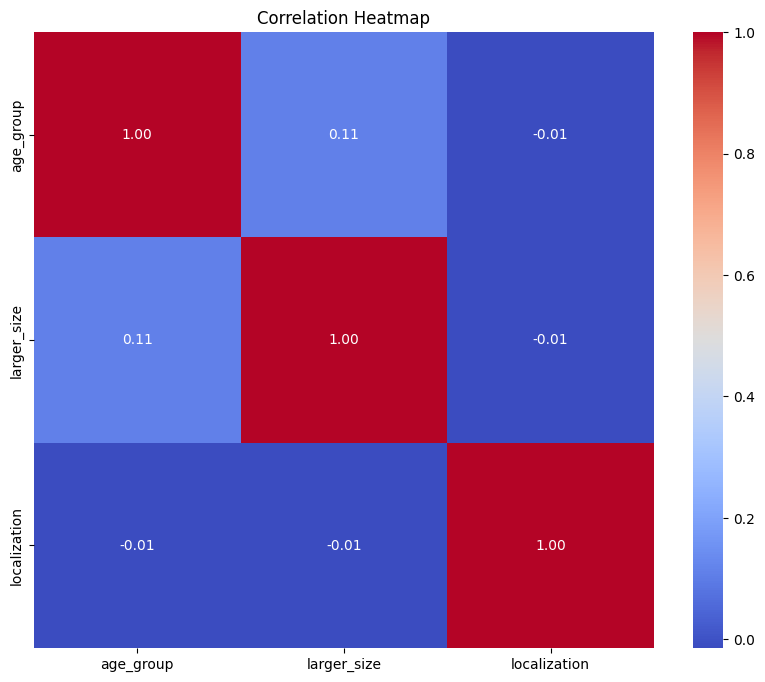

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

**Select Features and Target Variable**

In [ ]:
# Define features and target
features = [col for col in [
    'tobacco_use_1', 'alcohol_consumption_1', 'sun_exposure_1',
    'gender_1', 'skin_color_1', 'age_group', 'localization', 'larger_size'
] if col in data.columns]  # Only include columns that exist in the DataFrame

X = data[features]
y = data['diagnosis'].apply(lambda x: 1 if x == 'OSCC' else 0)

print("Features selected successfully!")
print("Feature columns:", features)

Features selected successfully!
Feature columns: ['tobacco_use_1', 'alcohol_consumption_1', 'sun_exposure_1', 'gender_1', 'skin_color_1', 'age_group', 'localization', 'larger_size']


**Split Data into Training and Testing Sets**

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling**

In [ ]:
# Apply feature scaling to standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training set
X_test = scaler.transform(X_test)        # Transform the test set (using the same scaler)

**Check the Preprocessed Data**

In [ ]:
# Display the shapes of the processed datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Optionally, display a sample of the preprocessed data
print("Sample preprocessed X_train:\n", X_train[:5])

X_train shape: (1789, 8)
X_test shape: (448, 8)
y_train shape: (1789,)
y_test shape: (448,)
Sample preprocessed X_train:
 [[-0.6917459   1.43279483 -0.24203281 -1.02662601  1.79702933  0.43076119
   0.48292889  1.87210902]
 [-0.6917459  -0.69793663 -0.24203281  0.97406455 -0.55647394 -0.31525214
   0.48292889  1.45992478]
 [ 1.44561752 -0.69793663 -0.24203281 -1.02662601 -0.55647394  0.43076119
   0.0831326   0.6355563 ]
 [ 1.44561752  1.43279483 -0.24203281 -1.02662601 -0.55647394 -0.31525214
   1.28252147  1.6660169 ]
 [-0.6917459   1.43279483 -0.24203281  0.97406455 -0.55647394 -0.31525214
   1.28252147 -0.3949043 ]]


**Exploratory Data Analysis**

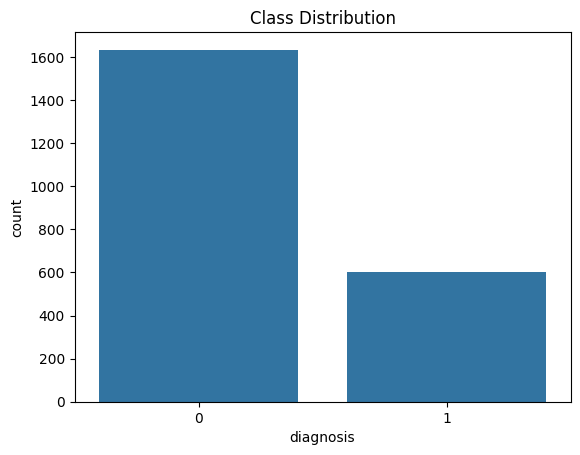

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

## **Model Training**
**1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_log_reg = log_reg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7232142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       324
           1       0.00      0.00      0.00       124

    accuracy                           0.72       448
   macro avg       0.36      0.50      0.42       448
weighted avg       0.52      0.72      0.61       448



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**2. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6517857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76       324
           1       0.38      0.41      0.40       124

    accuracy                           0.65       448
   macro avg       0.57      0.58      0.58       448
weighted avg       0.66      0.65      0.66       448



**3. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6919642857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.80       324
           1       0.43      0.32      0.37       124

    accuracy                           0.69       448
   macro avg       0.59      0.58      0.58       448
weighted avg       0.67      0.69      0.68       448

